In [9]:
import tensorflow as tf

In [2]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [8]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window in dataset:
    for val in window:
        print(val.numpy(), end=" ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [9]:
dataset = tf.data.Dataset.range(10)
# drop the incomplete window
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window in dataset:
    for val in window:
        print(val.numpy(), end=" ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [19]:
def batch_window(window):
    return window.batch(5)

In [21]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(batch_window)
for window in dataset:
    print(window.numpy())

[0 1 2 3 4]
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4], shape=(1,), dtype=int64)
[1 2 3 4 5]
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)
tf.Tensor([5], shape=(1,), dtype=int64)
[2 3 4 5 6]
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64)
tf.Tensor([6], shape=(1,), dtype=int64)
[3 4 5 6 7]
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64)
tf.Tensor([7], shape=(1,), dtype=int64)
[4 5 6 7 8]
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([8], shape=(1,), dtype=int64)
[5 6 7 8 9]
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64)
tf.Tensor([9], shape=(1,), dtype=int64)


In [23]:
def window_to_x_y(window):
    return (window[:-1], window[-1:])

In [24]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(batch_window)
dataset = dataset.map(window_to_x_y)
for window, target in dataset:
    print(window.numpy(), target.numpy())
    print()

[0 1 2 3] [4]

[1 2 3 4] [5]

[2 3 4 5] [6]

[3 4 5 6] [7]

[4 5 6 7] [8]

[5 6 7 8] [9]



In [25]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(batch_window)
dataset = dataset.map(window_to_x_y)
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for window, target in dataset:
    print("window: ", window.numpy())
    print("target: ", target.numpy())

window:  [[1 2 3 4]
 [0 1 2 3]]
target:  [[5]
 [4]]
window:  [[3 4 5 6]
 [2 3 4 5]]
target:  [[7]
 [6]]
window:  [[5 6 7 8]
 [4 5 6 7]]
target:  [[9]
 [8]]


In [21]:
ds = tf.data.Dataset.from_tensor_slices(list(range(1, 100)))
ds_windowed = ds.window(5, shift=2, drop_remainder=True)

In [44]:
ds_map = ds_windowed.map(lambda window: window.batch(5))

In [40]:
ds_flat_map = ds_windowed.flat_map(lambda window: window.batch(5))

In [46]:
ds_map_shuffle = ds_map.shuffle(1000)
for x in ds_map_shuffle:
    for y in x:
        print(y.numpy())

[35 36 37 38 39]
[59 60 61 62 63]
[19 20 21 22 23]
[1 2 3 4 5]
[85 86 87 88 89]
[95 96 97 98 99]
[65 66 67 68 69]
[87 88 89 90 91]
[21 22 23 24 25]
[3 4 5 6 7]
[55 56 57 58 59]
[73 74 75 76 77]
[5 6 7 8 9]
[47 48 49 50 51]
[29 30 31 32 33]
[23 24 25 26 27]
[51 52 53 54 55]
[75 76 77 78 79]
[15 16 17 18 19]
[61 62 63 64 65]
[ 7  8  9 10 11]
[13 14 15 16 17]
[49 50 51 52 53]
[77 78 79 80 81]
[69 70 71 72 73]
[17 18 19 20 21]
[79 80 81 82 83]
[71 72 73 74 75]
[43 44 45 46 47]
[39 40 41 42 43]
[67 68 69 70 71]
[45 46 47 48 49]
[89 90 91 92 93]
[27 28 29 30 31]
[53 54 55 56 57]
[11 12 13 14 15]
[83 84 85 86 87]
[81 82 83 84 85]
[31 32 33 34 35]
[41 42 43 44 45]
[37 38 39 40 41]
[63 64 65 66 67]
[57 58 59 60 61]
[91 92 93 94 95]
[93 94 95 96 97]
[33 34 35 36 37]
[ 9 10 11 12 13]
[25 26 27 28 29]


In [56]:
ds_tuple = ds_shuffle.map(lambda window: (window[:-1], window[-1]))
for x, y in ds_tuple:
    print(x.numpy(), '', y.numpy())

[45 46 47 48]  49
[31 32 33 34]  35
[ 9 10 11 12]  13
[93 94 95 96]  97
[27 28 29 30]  31
[73 74 75 76]  77
[91 92 93 94]  95
[5 6 7 8]  9
[81 82 83 84]  85
[69 70 71 72]  73
[53 54 55 56]  57
[17 18 19 20]  21
[89 90 91 92]  93
[75 76 77 78]  79
[33 34 35 36]  37
[25 26 27 28]  29
[47 48 49 50]  51
[67 68 69 70]  71
[19 20 21 22]  23
[87 88 89 90]  91
[1 2 3 4]  5
[29 30 31 32]  33
[15 16 17 18]  19
[3 4 5 6]  7
[13 14 15 16]  17
[95 96 97 98]  99
[83 84 85 86]  87
[51 52 53 54]  55
[65 66 67 68]  69
[55 56 57 58]  59
[35 36 37 38]  39
[85 86 87 88]  89
[77 78 79 80]  81
[37 38 39 40]  41
[43 44 45 46]  47
[79 80 81 82]  83
[59 60 61 62]  63
[23 24 25 26]  27
[ 7  8  9 10]  11
[41 42 43 44]  45
[21 22 23 24]  25
[11 12 13 14]  15
[39 40 41 42]  43
[61 62 63 64]  65
[71 72 73 74]  75
[57 58 59 60]  61
[49 50 51 52]  53
[63 64 65 66]  67


In [58]:
ds = ds_tuple.batch(32)

In [60]:
for x in ds.take(4):
    print(x)

(<tf.Tensor: shape=(32, 4), dtype=int32, numpy=
array([[45, 46, 47, 48],
       [33, 34, 35, 36],
       [47, 48, 49, 50],
       [85, 86, 87, 88],
       [31, 32, 33, 34],
       [11, 12, 13, 14],
       [95, 96, 97, 98],
       [25, 26, 27, 28],
       [41, 42, 43, 44],
       [93, 94, 95, 96],
       [77, 78, 79, 80],
       [71, 72, 73, 74],
       [91, 92, 93, 94],
       [19, 20, 21, 22],
       [ 5,  6,  7,  8],
       [17, 18, 19, 20],
       [83, 84, 85, 86],
       [69, 70, 71, 72],
       [63, 64, 65, 66],
       [39, 40, 41, 42],
       [61, 62, 63, 64],
       [ 7,  8,  9, 10],
       [65, 66, 67, 68],
       [23, 24, 25, 26],
       [37, 38, 39, 40],
       [35, 36, 37, 38],
       [81, 82, 83, 84],
       [29, 30, 31, 32],
       [57, 58, 59, 60],
       [49, 50, 51, 52],
       [89, 90, 91, 92],
       [43, 44, 45, 46]])>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([49, 37, 51, 89, 35, 15, 99, 29, 45, 97, 81, 75, 95, 23,  9, 21, 87,
       73, 67, 43, 65, 11, 69

In [61]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    # make a slice in the form of TensorSliceDataset of the original array
    dataset = tf.data.Dataset.from_tensor_slices(series)
    # shift: how many index to shift for a window
    # drop_remainder: drop the last few incomplete window
    # window_size + 1: use last window_size step to predict the target step (which is + 1)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    # unlike map, flat_map reduces the variant dataset to flat tensor
    # batch to group the window in a batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    # shuffle the window
    dataset = dataset.shuffle(shuffle_buffer)
    # use map because window is not a dataset object now and we do not need to flat it
    # separate predictors and target
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    # batch them to the batch size
    # prefetch: allows to extract the next step data while traning the current step
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [62]:
import numpy as np
import matplotlib.pyplot as  plt
import tensorflow as tf

In [63]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time
  
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
  
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

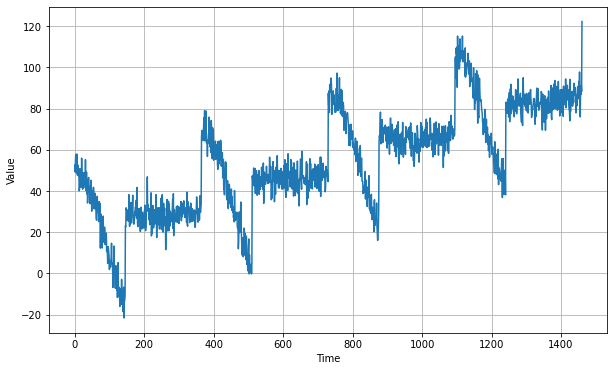

In [64]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [65]:
split_time = 1000
time_train = time[ : split_time]
x_train = series[ : split_time]

time_valid = time[split_time: ] # start from index split_time + 1
x_valid = series[split_time: ]

In [69]:
# avoid clutter from old models and layers and lear the global state
# used in 1. creating models in a loop    2. reset the layer name generation counter
tf.keras.backend.clear_session()
tf.random.set_seed(20902490)
np.random.seed(2092490)

# give a forecast using the previous 30 steps
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

In [72]:
# linear model
model = tf.keras.models.Sequential([
    # input_size = (30, )
    tf.keras.layers.Dense(1, input_shape=[window_size])
])

# momentum: velocity = momemtum * velocity - learning_rate * g
#           w = w + velocity
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), 
              metrics=["mae"])
model.fit(train_set, epochs=100, validation_data=valid_set)


Epoch 1/100
31/31 [==============================] - 1s 7ms/step - loss: 35.6414 - mae: 36.1387 - val_loss: 21.8959 - val_mae: 22.3948
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 10.4511 - mae: 10.9355 - val_loss: 9.3575 - val_mae: 9.8464
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 9.1188 - mae: 9.6040 - val_loss: 8.7666 - val_mae: 9.2586
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 8.9027 - mae: 9.3862 - val_loss: 8.5934 - val_mae: 9.0863
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 8.7715 - mae: 9.2574 - val_loss: 8.8162 - val_mae: 9.3034
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 8.6573 - mae: 9.1449 - val_loss: 8.3778 - val_mae: 8.8702
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 8.4853 - mae: 8.9739 - val_loss: 8.2392 - val_mae: 8.7292
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 8.36

31/31 [==============================] - 0s 5ms/step - loss: 5.5938 - mae: 6.0768 - val_loss: 5.7648 - val_mae: 6.2507
Epoch 64/100
31/31 [==============================] - 0s 4ms/step - loss: 5.5622 - mae: 6.0444 - val_loss: 5.6443 - val_mae: 6.1265
Epoch 65/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4887 - mae: 5.9699 - val_loss: 5.6584 - val_mae: 6.1393
Epoch 66/100
31/31 [==============================] - 0s 4ms/step - loss: 5.5026 - mae: 5.9876 - val_loss: 5.5721 - val_mae: 6.0494
Epoch 67/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4683 - mae: 5.9515 - val_loss: 6.2301 - val_mae: 6.7161
Epoch 68/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4688 - mae: 5.9468 - val_loss: 5.5661 - val_mae: 6.0442
Epoch 69/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4357 - mae: 5.9173 - val_loss: 5.5905 - val_mae: 6.0721
Epoch 70/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4679 - mae: 5

In [131]:
expected = []
for x, y in list(valid_set):
    for num in y:
        expected.append(num.numpy())
expected

[68.36095164526769,
 84.71283154392684,
 65.21421068949192,
 79.77924362925893,
 90.1446511737032,
 60.20002271204928,
 76.02121565042748,
 50.181426432365924,
 82.61261319148628,
 103.81107718719434,
 85.29467397366851,
 85.31413118200835,
 100.6605358656558,
 108.24974618764534,
 50.835942030455705,
 82.90243608125236,
 57.73594625391303,
 62.8596515319001,
 101.22144751150515,
 79.75053713630814,
 49.8833321960526,
 38.41570601945366,
 99.45927463461477,
 67.38816455605992,
 83.0620943624156,
 90.78627411521077,
 86.01069012944623,
 76.24479592681149,
 49.85228615565467,
 56.414443070973824,
 58.345170376644596,
 83.18591103247867,
 38.38186429560821,
 80.42562684387691,
 85.02870475637542,
 87.81478764703547,
 89.75962017517409,
 84.25977983039863,
 41.35576420997642,
 82.88434132127635,
 108.04521889307728,
 66.76590023376959,
 84.42109121923548,
 82.69966385920176,
 82.5022319718888,
 79.65324238587405,
 67.90589429347283,
 101.06370630755355,
 77.70465543701867,
 67.446539552757

In [143]:
len(expected)

431

In [101]:
predicted = model.predict(valid_set).flatten()

14/14 [==============================] - 0s 3ms/step


In [144]:
predicted

array([ 84.034164,  59.632812,  79.302666,  68.471176,  75.068085,
       101.985825,  85.673874,  47.887306,  78.29361 ,  74.55318 ,
        82.60012 ,  81.36807 ,  65.82683 ,  95.47635 ,  79.3019  ,
        66.9825  ,  75.24339 ,  75.59787 ,  88.6275  ,  76.04907 ,
        62.09187 ,  69.09094 , 106.58256 ,  55.242805,  80.792725,
        77.64686 ,  82.55615 ,  62.46602 ,  65.228676,  90.30229 ,
        88.75556 ,  80.13809 ,  60.885933,  87.805824,  98.021774,
        85.78074 ,  82.75274 ,  65.56682 ,  67.94423 ,  83.23625 ,
        83.75791 ,  86.54668 ,  49.17049 ,  87.08898 ,  79.332954,
        84.953766,  61.707882,  82.27626 ,  61.610886,  61.14293 ,
        81.65215 , 103.22535 ,  79.86962 ,  80.50722 ,  77.77022 ,
        71.010086,  79.93253 ,  71.805954,  82.53125 ,  81.59198 ,
        84.73239 ,  84.56834 ,  87.81972 ,  64.46912 ,  79.177124,
        79.2176  ,  48.502472,  84.503   , 111.40966 ,  87.049416,
        80.93991 ,  65.22915 ,  86.33325 ,  82.42967 ,  77.713

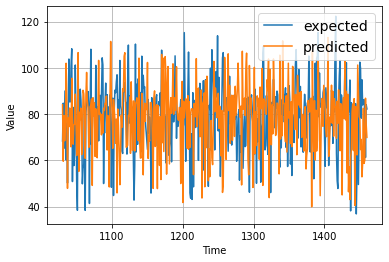

In [132]:
plot_series(time[-431:], expected, label="expected")
plot_series(time[-431:], predicted, label="predicted")

In [170]:
list(train_set.take(1))

[(<tf.Tensor: shape=(32, 30), dtype=float64, numpy=
  array([[ 25.85480088,  34.14500269,  28.56308528,  25.20002652,
           27.74989436,  31.45096125,  26.59732959,  25.33466534,
           30.69418357,  30.73072443,  27.00148228,  27.21147442,
           30.75754331,  22.38765816,  22.62170452,  26.09790179,
           28.65414135,  31.3073226 ,  37.1611257 ,  34.10435352,
           29.04822325,  29.78484383,  24.89943429,  29.85181773,
           28.53353738,  31.62301422,  25.90600005,  32.67176202,
           37.77173887,  29.59739746],
         [ 40.86737168,  59.28610463,  46.73495344,  46.52831258,
           46.3580927 ,  47.48943909,  45.79775351,  43.67202696,
           43.82706289,  46.41884905,  43.88698462,  43.06160598,
           47.17994389,  45.39509405,  54.21236013,  33.460187  ,
           52.19543509,  52.99141371,  36.41734379,  45.09438268,
           44.97435873,  39.81796193,  42.99060747,  41.35119362,
           55.6900167 ,  51.63185606,  53.33624546,

In [179]:
tf.keras.backend.clear_session()
tf.random.set_seed(20902490)
np.random.seed(2092490)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(window_size, ))
])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-6 * 10 ** (epoch / 30))

model.compile(loss=tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), 
              metrics=["mae"])
history = model.fit(train_set, epochs=100, validation_data=valid_set, callbacks=[scheduler])


Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 38.3443 - mae: 38.8430 - val_loss: 57.0529 - val_mae: 57.5529 - lr: 1.0000e-06
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 23.8164 - mae: 24.3126 - val_loss: 26.5039 - val_mae: 27.0032 - lr: 1.0798e-06
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 12.5571 - mae: 13.0500 - val_loss: 10.7033 - val_mae: 11.1923 - lr: 1.1659e-06
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 10.7926 - mae: 11.2808 - val_loss: 10.2201 - val_mae: 10.7094 - lr: 1.2589e-06
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 10.7610 - mae: 11.2492 - val_loss: 10.3186 - val_mae: 10.8085 - lr: 1.3594e-06
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 10.7157 - mae: 11.2048 - val_loss: 10.3466 - val_mae: 10.8366 - lr: 1.4678e-06
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 10.7029 - mae: 

31/31 [==============================] - 0s 4ms/step - loss: 5.1434 - mae: 5.6226 - val_loss: 5.4256 - val_mae: 5.9037 - lr: 6.3096e-05
Epoch 56/100
31/31 [==============================] - 0s 4ms/step - loss: 5.3110 - mae: 5.7926 - val_loss: 7.2278 - val_mae: 7.7179 - lr: 6.8129e-05
Epoch 57/100
31/31 [==============================] - 0s 4ms/step - loss: 5.6875 - mae: 6.1711 - val_loss: 6.0462 - val_mae: 6.5255 - lr: 7.3564e-05
Epoch 58/100
31/31 [==============================] - 0s 4ms/step - loss: 5.4720 - mae: 5.9556 - val_loss: 6.4335 - val_mae: 6.9154 - lr: 7.9433e-05
Epoch 59/100
31/31 [==============================] - 0s 4ms/step - loss: 5.3183 - mae: 5.7980 - val_loss: 5.3564 - val_mae: 5.8412 - lr: 8.5770e-05
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 4.8559 - mae: 5.3361 - val_loss: 6.0066 - val_mae: 6.4923 - lr: 9.2612e-05
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 5.1909 - mae: 5.6754 - val_loss: 8.4382 - val

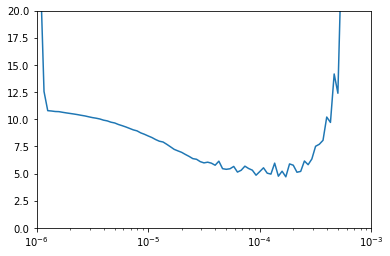

In [181]:
# make a plot with log scaling on the x axis
plt.semilogx(history.history["lr"], history.history["loss"])
dummy = plt.axis([1e-6, 1e-3, 0, 20])

In [184]:
tf.keras.backend.clear_session()
tf.random.set_seed(20902490)
np.random.seed(2092490)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(window_size, ))
])
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), 
              metrics=["mae"])

# patience:
# number of epochs with no improvement after which training will be stopped
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_set, epochs=500, validation_data=valid_set, callbacks=[early_stopping])
# stops at 160 epoches

Epoch 1/500
31/31 [==============================] - 1s 7ms/step - loss: 32.3299 - mae: 32.8268 - val_loss: 16.8917 - val_mae: 17.3897
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 8.3356 - mae: 8.8203 - val_loss: 7.2923 - val_mae: 7.7762
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 7.6667 - mae: 8.1547 - val_loss: 7.5510 - val_mae: 8.0324
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 7.6120 - mae: 8.0990 - val_loss: 7.2713 - val_mae: 7.7531
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 7.4885 - mae: 7.9773 - val_loss: 7.1378 - val_mae: 7.6204
Epoch 6/500
31/31 [==============================] - 0s 4ms/step - loss: 7.4549 - mae: 7.9406 - val_loss: 7.1756 - val_mae: 7.6571
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 7.4008 - mae: 7.8846 - val_loss: 7.0281 - val_mae: 7.5104
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 7.2985

31/31 [==============================] - 0s 4ms/step - loss: 5.3260 - mae: 5.8066 - val_loss: 5.2948 - val_mae: 5.7766
Epoch 64/500
31/31 [==============================] - 0s 4ms/step - loss: 5.3937 - mae: 5.8789 - val_loss: 5.7397 - val_mae: 6.2232
Epoch 65/500
31/31 [==============================] - 0s 3ms/step - loss: 5.3159 - mae: 5.7947 - val_loss: 5.2851 - val_mae: 5.7627
Epoch 66/500
31/31 [==============================] - 0s 4ms/step - loss: 5.2962 - mae: 5.7753 - val_loss: 5.2772 - val_mae: 5.7525
Epoch 67/500
31/31 [==============================] - 0s 3ms/step - loss: 5.2643 - mae: 5.7428 - val_loss: 5.2233 - val_mae: 5.7048
Epoch 68/500
31/31 [==============================] - 0s 3ms/step - loss: 5.2135 - mae: 5.6904 - val_loss: 5.3162 - val_mae: 5.7907
Epoch 69/500
31/31 [==============================] - 0s 3ms/step - loss: 5.1982 - mae: 5.6780 - val_loss: 5.1864 - val_mae: 5.6682
Epoch 70/500
31/31 [==============================] - 0s 3ms/step - loss: 5.2069 - mae: 5

Epoch 125/500
31/31 [==============================] - 0s 4ms/step - loss: 4.5745 - mae: 5.0502 - val_loss: 4.6069 - val_mae: 5.0845
Epoch 126/500
31/31 [==============================] - 0s 4ms/step - loss: 4.5485 - mae: 5.0250 - val_loss: 4.6150 - val_mae: 5.0912
Epoch 127/500
31/31 [==============================] - 0s 5ms/step - loss: 4.5274 - mae: 5.0031 - val_loss: 4.5911 - val_mae: 5.0692
Epoch 128/500
31/31 [==============================] - 0s 4ms/step - loss: 4.5298 - mae: 5.0050 - val_loss: 4.6523 - val_mae: 5.1306
Epoch 129/500
31/31 [==============================] - 0s 5ms/step - loss: 4.6147 - mae: 5.0928 - val_loss: 4.5723 - val_mae: 5.0518
Epoch 130/500
31/31 [==============================] - 0s 5ms/step - loss: 4.5345 - mae: 5.0139 - val_loss: 4.6686 - val_mae: 5.1391
Epoch 131/500
31/31 [==============================] - 0s 5ms/step - loss: 4.5051 - mae: 4.9834 - val_loss: 4.8755 - val_mae: 5.3473
Epoch 132/500
31/31 [==============================] - 0s 4ms/step - 

In [193]:
def model_forecast(model, series, window_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size))
    dataset = dataset.batch(32).prefetch(1)
    forecast = model.predict(dataset)
    return forecast

In [212]:
lin_forecast = model_forecast(model, series[split_time - window_size: -1], window_size)

15/15 [==============================] - 0s 3ms/step


In [219]:
lin_forecast = lin_forecast[:, 0]
lin_forecast.shape

(461,)

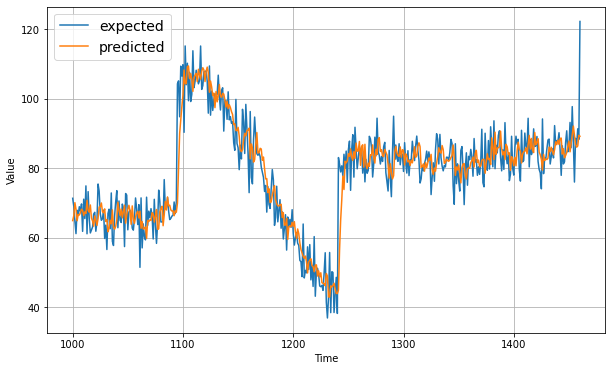

In [220]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="expected")
plot_series(time_valid, lin_forecast, label="predicted")

In [221]:
tf.keras.metrics.mean_absolute_error(x_valid, lin_forecast).numpy()

4.935261

In [223]:
tf.keras.backend.clear_session()
tf.random.set_seed(20902490)
np.random.seed(2092490)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(window_size, )),
    tf.keras.layers.Dense(10, activation="relu", ),
    tf.keras.layers.Dense(1)
])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-6 * 10 ** (epoch / 30))

model.compile(loss=tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), 
              metrics=["mae"])
history = model.fit(train_set, epochs=100, validation_data=valid_set, callbacks=[scheduler])

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 32.1974 - mae: 32.6956 - val_loss: 55.8712 - val_mae: 56.3712 - lr: 1.0000e-06
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 27.0949 - mae: 27.5934 - val_loss: 43.8078 - val_mae: 44.3078 - lr: 1.0798e-06
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 19.9933 - mae: 20.4890 - val_loss: 28.4858 - val_mae: 28.9858 - lr: 1.1659e-06
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 11.9704 - mae: 12.4643 - val_loss: 12.2229 - val_mae: 12.7151 - lr: 1.2589e-06
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 7.3168 - mae: 7.8008 - val_loss: 6.5725 - val_mae: 7.0514 - lr: 1.3594e-06
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 6.8321 - mae: 7.3146 - val_loss: 6.5987 - val_mae: 7.0787 - lr: 1.4678e-06
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 6.7949 - mae: 7.2775 - 

Epoch 56/100
31/31 [==============================] - 0s 3ms/step - loss: 4.7401 - mae: 5.2152 - val_loss: 4.7873 - val_mae: 5.2621 - lr: 6.8129e-05
Epoch 57/100
31/31 [==============================] - 0s 4ms/step - loss: 4.6978 - mae: 5.1740 - val_loss: 4.9007 - val_mae: 5.3798 - lr: 7.3564e-05
Epoch 58/100
31/31 [==============================] - 0s 3ms/step - loss: 4.8406 - mae: 5.3172 - val_loss: 5.5195 - val_mae: 6.0064 - lr: 7.9433e-05
Epoch 59/100
31/31 [==============================] - 0s 4ms/step - loss: 4.8256 - mae: 5.3006 - val_loss: 4.9005 - val_mae: 5.3797 - lr: 8.5770e-05
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 4.7532 - mae: 5.2321 - val_loss: 6.2251 - val_mae: 6.7095 - lr: 9.2612e-05
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 4.7844 - mae: 5.2651 - val_loss: 4.5772 - val_mae: 5.0473 - lr: 1.0000e-04
Epoch 62/100
31/31 [==============================] - 0s 4ms/step - loss: 4.6514 - mae: 5.1271 - val_loss:

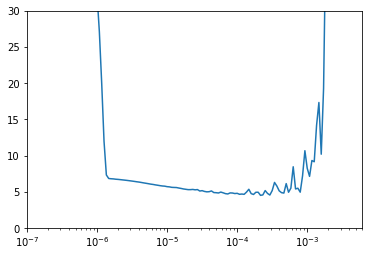

In [224]:
plt.semilogx(history.history["lr"], history.history["loss"])
dummy = plt.axis([1e-7, 6e-3, 0, 30])

In [225]:
tf.keras.backend.clear_session()
tf.random.set_seed(20902490)
np.random.seed(2092490)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(window_size, )),
    tf.keras.layers.Dense(10, activation="relu", ),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), 
              metrics=["mae"])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_set, epochs=500, validation_data=valid_set, callbacks=[early_stopping])
# stops at 62 epoches

Epoch 1/500
31/31 [==============================] - 1s 11ms/step - loss: 8.7579 - mae: 9.2419 - val_loss: 7.7986 - val_mae: 8.2834
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 6.5657 - mae: 7.0490 - val_loss: 6.5352 - val_mae: 7.0177
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 6.2655 - mae: 6.7445 - val_loss: 6.3531 - val_mae: 6.8365
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 6.0517 - mae: 6.5297 - val_loss: 5.8944 - val_mae: 6.3719
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 5.9217 - mae: 6.4022 - val_loss: 5.9946 - val_mae: 6.4702
Epoch 6/500
31/31 [==============================] - 0s 4ms/step - loss: 5.8257 - mae: 6.3040 - val_loss: 5.8468 - val_mae: 6.3252
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 5.7442 - mae: 6.2263 - val_loss: 6.2470 - val_mae: 6.7346
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 5.6812 - 

In [229]:
dense_forecast = model_forecast(model, series[split_time - window_size : -1], window_size)[:, 0]

15/15 [==============================] - 0s 3ms/step


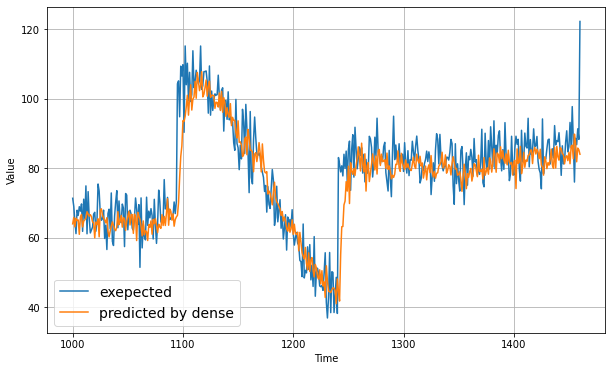

In [230]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="exepected")
plot_series(time_valid, dense_forecast, label="predicted by dense")

In [234]:
tf.keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

5.4686675